<h1 style="color:#33918d; font-weight: bold;">Análisis de datos sobre la evolución del anime</h1>

 <h4 style="color:#33918d;">En el archivo data-no-mining hemos conseguido, a partir de una API y un DataFrame de Kaggle, un DataFrame con toda la informacion que necesito.

Voy a empezar con la limpieza de ese y otro data frame del 2019.

Mas tarde voy a comenzar con los insights comparando un DataFrame con otro.</h4>

 <h4 style="color:#cc5064;">Primero las librerias y los data set a limpiar</h4>

In [1]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
from funciones import *


df_2024 = pd.read_csv('anime_data.csv')
df_2019 = pd.read_csv('Anime.csv')

 <h4 style="color:#33918d;">Primero voy a compararlas para ver si los id estan bien.</h4>

In [2]:
resultados_comparacion = []


for index, row in df_2024.iterrows():
    id_actual = row['mal_id'] 
    nombre_actual = row['titles']  
    
    df_2019_row = df_2019[df_2019['animeID'] == id_actual]
    
    if not df_2019_row.empty:  
        nombre_2019 = df_2019_row[' name'].iloc[0]  
        
        
        if nombre_actual == nombre_2019:
            resultados_comparacion.append(True)
        else:
            resultados_comparacion.append(False)
    else:
        resultados_comparacion.append(False) 


df_2024['coincide_nombre'] = resultados_comparacion


print(df_2024[['mal_id', 'titles', 'coincide_nombre']].head())

   mal_id              titles  coincide_nombre
0    1550         Attack No.1             True
1    2406           Sazae-san             True
2    9895        The Bathroom             True
3    9163  Attack No.1 (1970)             True
4    7259          Kenju Giga             True


In [3]:
total_true = df_2024['coincide_nombre'].sum()
print(f'Número de coincidencias True: {total_true}')

Número de coincidencias True: 3921


##### Entonces podemos usar los dos DF ya que los id coinciden, hay muchos que no coinciden por que a lo mejor no salieron esos animes en 2019.

 <h2 style="color:#cc5064;font-weight: bold;">Inspección y limpieza 2024</h2>

In [4]:
df_2024.head()

,mal_id,titles,type,genre_1,genre_2,source,studios,episodes,rating,score,...,rank,members,favorites,synopsis,airing,genres,year,season,status,coincide_nombre
0,1550,Attack No.1,TV,Drama,Sports,Manga,Tokyo Movie Shinsha,104.0,PG-13 - Teens 13 or older,7.07,...,4124.0,9979,72,Kozue is a middleschool girl and enthusiastic ...,False,"[{'mal_id': 8, 'type': 'anime', 'name': 'Drama...",1970.0,winter,Finished Airing,True
1,2406,Sazae-san,TV,Comedy,Slice of Life,4-koma manga,Eiken,NaN,G - All Ages,6.14,...,9126.0,8403,38,The main character is a mother named Sazae-san...,True,"[{'mal_id': 4, 'type': 'anime', 'name': 'Comed...",1969.0,fall,Currently Airing,True
2,9895,The Bathroom,Movie,Avant Garde,Comedy,Original,Kuri Jikken Manga Koubou,1.0,R - 17+ (violence & profanity),4.22,...,13223.0,1779,0,A surrealistic short from minimalist cartoonis...,NaN,NaN,NaN,NaN,NaN,True
3,9163,Attack No.1 (1970),Movie,Drama,Sports,Unknown,NaN,1.0,PG-13 - Teens 13 or older,6.39,...,7795.0,1410,3,"The first recap film of Attack No.1 , it cover...",NaN,NaN,NaN,NaN,NaN,True
4,7259,Kenju Giga,Movie,NaN,NaN,Original,NaN,1.0,PG-13 - Teens 13 or older,4.92,...,12800.0,1206,0,"A dog race is interrupted by a ringmaster, who...",False,[],NaN,NaN,Finished Airing,True


In [5]:
df_2024['studios'].isnull().sum()

512

In [6]:
df_2024.columns
#La columnas ya estan limpias porque las limpié en el anterior para poder hacer bien la busqueda de información y el merge.

Index(['mal_id', 'titles', 'type', 'genre_1', 'genre_2', 'source', 'studios',
       'episodes', 'rating', 'score', 'audicence_rank', 'scored_by', 'rank',
       'members', 'favorites', 'synopsis', 'airing', 'genres', 'year',
       'season', 'status', 'coincide_nombre'],
      dtype='object')

In [7]:
df_2024 = df_2024.drop(['members','favorites'],axis=1)

In [8]:
df_2024.shape

(5057, 20)

In [9]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5057 entries, 0 to 5056
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mal_id           5057 non-null   int64  
 1   titles           5057 non-null   object 
 2   type             5056 non-null   object 
 3   genre_1          4812 non-null   object 
 4   genre_2          3950 non-null   object 
 5   source           5057 non-null   object 
 6   studios          4545 non-null   object 
 7   episodes         4540 non-null   float64
 8   rating           5023 non-null   object 
 9   score            4818 non-null   float64
 10  audicence_rank   5057 non-null   int64  
 11  scored_by        4818 non-null   float64
 12  rank             4787 non-null   float64
 13  synopsis         5010 non-null   object 
 14  airing           3122 non-null   object 
 15  genres           3122 non-null   object 
 16  year             3401 non-null   float64
 17  season        

In [10]:
df_2024.describe().T

,count,mean,std,min,25%,50%,75%,max
mal_id,5057.0,13433.425351,16424.620045,1.0,1426.00,4521.00,23347.00,58391.00
episodes,4540.0,18.505507,62.323441,1.0,1.00,12.00,23.00,1787.00
score,4818.0,7.029504,0.931694,2.0,6.46,7.11,7.67,9.38
audicence_rank,5057.0,5828.447301,5668.328712,1.0,1050.00,3846.00,9501.00,26508.00
scored_by,4818.0,122898.908053,274892.283190,105.0,1723.25,17952.00,118254.50,2795232.00
rank,4787.0,4862.502402,4240.225219,1.0,1321.00,3880.00,7453.00,20609.00
year,3401.0,2001.742135,14.290791,1969.0,1993.00,2003.00,2013.00,2024.00


In [11]:
df_2024.describe(include='object').T

,count,unique,top,freq
titles,5057,4516,Sazae-san,126
type,5056,8,TV,2861
genre_1,4812,21,Action,1814
genre_2,3950,20,Adventure,769
source,5057,17,Manga,2147
studios,4545,338,Toei Animation,487
rating,5023,6,PG-13 - Teens 13 or older,2445
synopsis,5010,4442,The main character is a mother named Sazae-san...,126
airing,3122,2,False,2617
genres,3122,500,"[{'mal_id': 1, 'type': 'anime', 'name': 'Actio...",155


In [12]:
df_2024.dtypes

mal_id               int64
titles              object
type                object
genre_1             object
genre_2             object
source              object
studios             object
episodes           float64
rating              object
score              float64
audicence_rank       int64
scored_by          float64
rank               float64
synopsis            object
airing              object
genres              object
year               float64
season              object
status              object
coincide_nombre       bool
dtype: object

In [13]:
df_2024.nunique()

mal_id             4516
titles             4516
type                  8
genre_1              21
genre_2              20
source               17
studios             338
episodes            160
rating                6
score               472
audicence_rank     4358
scored_by          3822
rank               3844
synopsis           4442
airing                2
genres              500
year                 56
season                4
status                2
coincide_nombre       2
dtype: int64

In [14]:
#mal_id pone que hay 4516 unicos, significa que hay animes repetidos.
df_2024.duplicated().sum()

541

In [15]:
df_2024 = df_2024.drop_duplicates(keep='first')

In [16]:
df_2024['source'].unique()

array(['Manga', '4-koma manga', 'Original', 'Unknown', 'Novel',
       'Picture book', 'Music', 'Other', 'Book', 'Radio', 'Light novel',
       'Game', 'Mixed media', 'Visual novel', 'Card game', 'Web manga',
       'Web novel'], dtype=object)

In [17]:
sustitucion = {
    '4-koma manga':'Manga',
    'Web manga':'Manga',
    'Web novel':'Novel',
    }
df_2024['source'] = df_2024['source'].replace(sustitucion)
df_2024['source'].unique()

array(['Manga', 'Original', 'Unknown', 'Novel', 'Picture book', 'Music',
       'Other', 'Book', 'Radio', 'Light novel', 'Game', 'Mixed media',
       'Visual novel', 'Card game'], dtype=object)

In [18]:
#Es lo mismo que status
df_2024['airing'].unique()

array([False, True, nan], dtype=object)

In [19]:
df_2024 = df_2024.drop('airing',axis=1)

In [20]:
sustitucion1 = {
    'PG-13 - Teens 13 or older':'Teens or older',
    'G - All Ages':'All Ages',
    'R - 17+ (violence & profanity)':'17+',
    'PG - Children':'Children',
    'R+ - Mild Nudity':'Mild Nudity',
    'Rx - Hentai':'+18'
    }
df_2024['rating'] = df_2024['rating'].replace(sustitucion1)
df_2024['rating'].unique()

array(['Teens or older', 'All Ages', '17+', 'Children', 'Mild Nudity',
       nan, '+18'], dtype=object)

In [21]:
#Puede ser que sea por que son temporadas distintas de ciertos animes pero les dan la misma sinopsis, vamos a ver.
df_2024['synopsis'].duplicated().sum()

73

In [22]:
duplicados = df_2024[df_2024['synopsis'].duplicated(keep=False)]
duplicados[['mal_id', 'titles', 'synopsis']].head(88)
#Vale es lo que pensaba, es por segundas temporadas o por falta de sinopsis solo ponen el autor...

,mal_id,titles,synopsis
11,29673,Shin Tenchi Souzou,Independent animation by Tsukioka Sadao.
13,30327,New York Trip,Furukawa Taku film.
16,24927,Chuuchuu Banban,NaN
18,36380,Power Powan,NaN
68,29675,Sarasoujuu no Hana no Iro,Independent animation by Tsukioka Sadao.
...,...,...,...
1853,5584,New Dream Hunter Rem: Setsuriku no Mudenmekyu,"Rem is an ordinary woman in our world but, in ..."
1933,666,JoJo no Kimyou na Bouken,"Kujo Jotaro is a normal, popular Japanese high..."
2590,665,JoJo no Kimyou na Bouken: Adventure,"Kujo Jotaro is a normal, popular Japanese high..."
3012,241,Girls Bravo: First Season,"Small for his age, Yukinari has been bullied a..."


In [23]:
df_2024.isna().sum()

mal_id                0
titles                0
type                  1
genre_1             245
genre_2            1057
source                0
studios             512
episodes             17
rating               34
score               239
audicence_rank        0
scored_by           239
rank                270
synopsis             47
genres             1892
year               1648
season             3286
status             1892
coincide_nombre       0
dtype: int64

In [24]:
#No me interesan las rows que no tienen score
df_2024 = df_2024.dropna(subset=['score'])

In [25]:
#Tampoco las que no tienen rank
df_2024 = df_2024.dropna(subset=['rank'])

In [26]:
#Me faltan muchos en año asi que voy a utilizar los años que vienen en el otro pos si puedo rellenar algunas, el resto iran como unknown.
df_2019['aired_year'] = df_2019[' aired'].astype(str).str.extract(r'(\d{4})')
df_2019['aired_year'].head()

0    1998
1    2001
2    1998
3    2002
4    2004
Name: aired_year, dtype: object

In [27]:
#Había que limpiarlos primero y aqui los meto.
id_to_year = df_2019.set_index('animeID')['aired_year']
df_2024['year'] = df_2024['year'].fillna(df_2024['mal_id'].map(id_to_year))

In [28]:
#Quitamos ya la synopsis, solo la necesitaba para ver si gracias a ellas conseguia identificar nulos.
df_2024 = df_2024.drop('synopsis', axis=1)

In [29]:
# He tenido que aplicar de nuevo lo de los generos porque de la api saque más.
#Tambien venian en lista pero tuve que hacer esto extra porque si no no me permitia separarlas.
df_2024['genres'] = df_2024['genres'].apply(extraer_nombres_generos)

In [30]:
# Primero, creamos una nueva DataFrame con las listas convertidas en series.
genres_split = df_2024['genres'].apply(lambda x: pd.Series(x) if isinstance(x, list) else pd.Series([None]*3))
genres_split.columns = ['genres_1', 'genres_2', 'genres_3', 'genres_4', 'genres_5','genres_6','genres_7']

# Concatenar las nuevas columnas al DataFrame original
df_nuevo = pd.concat([df_2024.drop(columns=['genres']), genres_split], axis=1)

In [31]:
proporcion_nulos = df_nuevo[['genres_1', 'genres_2', 'genres_3', 'genres_4', 'genres_5', 'genres_6', 'genres_7']].isna().sum() / df_nuevo.shape[0]
print(proporcion_nulos)

genres_1    0.389569
genres_2    0.481636
genres_3    0.658668
genres_4    0.851616
genres_5    0.956170
genres_6    0.990940
genres_7    0.998776
dtype: float64


In [32]:
df_nuevo = df_nuevo.drop(['genres_3', 'genres_4', 'genres_5', 'genres_6', 'genres_7'], axis=1)
df_2024 = df_nuevo

In [33]:
# Rellenar los valores nulos de 'genres_1' con los valores de 'genre_1'
df_2024['genres_1'] = df_2024['genres_1'].fillna(df_2024['genre_1'])
df_2024['genres_2'] = df_2024['genres_2'].fillna(df_2024['genre_2'])

In [34]:
#He rellenado los que podia solucionar con información del otro data frame, el resto unknown.
# Para columnas de texto.
for col in ['genres_1', 'genres_2', 'studios', 'rating', 'status', 'season', 'type']:
    df_2024[col] = df_2024[col].fillna('Unknown')

# Para columnas numéricas.
for col in ['episodes', 'year']:
    df_2024[col] = df_2024[col].fillna(-1)

In [35]:
df_2024 = df_2024.drop(['genre_1', 'genre_2'], axis=1)

In [36]:
df_2024.isna().sum()

mal_id             0
titles             0
type               0
source             0
studios            0
episodes           0
rating             0
score              0
audicence_rank     0
scored_by          0
rank               0
year               0
season             0
status             0
coincide_nombre    0
genres_1           0
genres_2           0
dtype: int64

In [37]:
df_2024.columns

Index(['mal_id', 'titles', 'type', 'source', 'studios', 'episodes', 'rating',
       'score', 'audicence_rank', 'scored_by', 'rank', 'year', 'season',
       'status', 'coincide_nombre', 'genres_1', 'genres_2'],
      dtype='object')

In [38]:
df_2024.dtypes

mal_id               int64
titles              object
type                object
source              object
studios             object
episodes           float64
rating              object
score              float64
audicence_rank       int64
scored_by          float64
rank               float64
year                object
season              object
status              object
coincide_nombre       bool
genres_1            object
genres_2            object
dtype: object

In [39]:
#Despues de quitar los nulos ya puedo convertir los float a int sin problema.
cols_to_convert = ['episodes', 'audicence_rank', 'scored_by', 'rank']
df_2024[cols_to_convert] = df_2024[cols_to_convert].astype(int)

In [40]:
#Después de rellenarlo con los strings de el otro data set también puedo ya convertirlo a int sin problema.
df_2024['year'] = df_2024['year'].astype(int)

In [41]:
df_2024.dtypes

mal_id               int64
titles              object
type                object
source              object
studios             object
episodes             int32
rating              object
score              float64
audicence_rank       int32
scored_by            int32
rank                 int32
year                 int32
season              object
status              object
coincide_nombre       bool
genres_1            object
genres_2            object
dtype: object

In [42]:
#Limpito!!

<h2 style="color:#33918d; font-weight: bold;">Inspección y Limpieza 2019</h2>

In [43]:
df_2019.columns

Index(['animeID', ' name', ' title_english', ' title_japanese',
       ' title_synonyms', ' type', ' source', ' producers', ' genre',
       ' studio', ' episodes', ' status', ' airing', ' aired', ' duration',
       ' rating', ' score', ' scored_by', ' rank', ' popularity', ' members',
       ' favorites', ' synopsis', ' background', ' premiered', ' broadcast',
       ' related', 'aired_year'],
      dtype='object')

In [44]:
#Voy a empezar con las columnas ya que este dataframe solo lo necesito para compararlo con el otro, no necesito más informacion adicional.
df_2019.drop([' title_english', ' title_japanese',
       ' title_synonyms', ' producers', ' episodes', ' status', ' airing', ' aired', ' duration',
       ' members', ' favorites', ' synopsis', ' background', ' premiered', ' broadcast',
       ' related',' rating', ' studio'], axis=1, inplace=True)

In [45]:
df_2019.head()

,animeID,name,type,source,genre,score,scored_by,rank,popularity,aired_year
0,1,Cowboy Bebop,TV,Original,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",8.81,405664.0,26.0,39.0,1998
1,5,Cowboy Bebop: Tengoku no Tobira,Movie,Original,"['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']",8.41,120243.0,164.0,449.0,2001
2,6,Trigun,TV,Manga,"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",8.30,212537.0,255.0,146.0,1998
3,7,Witch Hunter Robin,TV,Original,"['Action', 'Magic', 'Police', 'Supernatural', ...",7.33,32837.0,2371.0,1171.0,2002
4,8,Bouken Ou Beet,TV,Manga,"['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",7.03,4894.0,3544.0,3704.0,2004


In [46]:
print(df_2019[' genre'].head(10))

0    ['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...
1    ['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']
2    ['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...
3    ['Action', 'Magic', 'Police', 'Supernatural', ...
4    ['Adventure', 'Fantasy', 'Shounen', 'Supernatu...
5    ['Comedy', 'Drama', 'Josei', 'Romance', 'Slice...
6     ['Slice of Life', 'Comedy', 'Sports', 'Shounen']
7      ['Action', 'Cars', 'Sports', 'Drama', 'Seinen']
8    ['Drama', 'Horror', 'Mystery', 'Police', 'Psyc...
9    ['Action', 'Adventure', 'Comedy', 'Super Power...
Name:  genre, dtype: object


In [47]:
# Asegurarse de que 'genre' sea siempre una lista, incluso si está en formato de cadena
df_2019[' genre'] = df_2019[' genre'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Verificar el tipo de 'genre' y su longitud después de la conversión
df_2019['genre_length'] = df_2019[' genre'].apply(lambda x: len(x) if isinstance(x, list) else None)

# Ver los resultados
print(df_2019[[' genre', 'genre_length']].head(10))
#Todo esto lo he hecho porque al extraerlo me salian las listas vacias, para comprobar lo que contenia.

                                               genre  genre_length
0  [Action, Adventure, Comedy, Drama, Sci-Fi, Space]           6.0
1            [Action, Drama, Mystery, Sci-Fi, Space]           5.0
2  [Action, Sci-Fi, Adventure, Comedy, Drama, Sho...           6.0
3  [Action, Magic, Police, Supernatural, Drama, M...           6.0
4        [Adventure, Fantasy, Shounen, Supernatural]           4.0
5     [Comedy, Drama, Josei, Romance, Slice of Life]           5.0
6           [Slice of Life, Comedy, Sports, Shounen]           4.0
7              [Action, Cars, Sports, Drama, Seinen]           5.0
8  [Drama, Horror, Mystery, Police, Psychological...           7.0
9  [Action, Adventure, Comedy, Super Power, Marti...           6.0


In [48]:
# Extraer los dos primeros géneros y asignarlos a las columnas genre_1 y genre_2
df_2019['genre_1'] = df_2019[' genre'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
df_2019['genre_2'] = df_2019[' genre'].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else None)

# Verificar el resultado
print(df_2019[['genre_1', 'genre_2']].head(10))

         genre_1    genre_2
0         Action  Adventure
1         Action      Drama
2         Action     Sci-Fi
3         Action      Magic
4      Adventure    Fantasy
5         Comedy      Drama
6  Slice of Life     Comedy
7         Action       Cars
8          Drama     Horror
9         Action  Adventure


In [49]:
df_2019.shape

(15278, 13)

In [50]:
df_2019.describe().T

,count,mean,std,min,25%,50%,75%,max
animeID,15278.0,19002.639416,13706.437012,1.0,5209.25,18308.00,33025.75,39199.0
score,14778.0,6.284508,1.073349,1.0,5.60,6.37,7.05,10.0
scored_by,15273.0,12107.014601,46929.422586,0.0,47.00,470.00,3857.00,1107955.0
rank,13669.0,6917.408004,4003.814986,0.0,3448.00,6932.00,10416.00,13838.0
popularity,15273.0,7741.991292,4482.323035,0.0,3855.00,7769.00,11627.00,15474.0
genre_length,15273.0,2.869443,1.668776,0.0,2.00,3.00,4.00,18.0


In [51]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15278 entries, 0 to 15277
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   animeID       15278 non-null  int64  
 1    name         15278 non-null  object 
 2    type         15273 non-null  object 
 3    source       15273 non-null  object 
 4    genre        15273 non-null  object 
 5    score        14778 non-null  float64
 6    scored_by    15273 non-null  float64
 7    rank         13669 non-null  float64
 8    popularity   15273 non-null  float64
 9   aired_year    15007 non-null  object 
 10  genre_length  15273 non-null  float64
 11  genre_1       15206 non-null  object 
 12  genre_2       11466 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 1.5+ MB


In [52]:
df_2019['aired_year'] = pd.to_numeric(df_2019['aired_year'], errors='coerce')

In [53]:
#Voy a limpiar los nombres de las columnas.
df_2019.columns

Index(['animeID', ' name', ' type', ' source', ' genre', ' score',
       ' scored_by', ' rank', ' popularity', 'aired_year', 'genre_length',
       'genre_1', 'genre_2'],
      dtype='object')

In [54]:
df_2019.columns = df_2019.columns.str.strip() 
df_2019.rename(columns={
    'animeID': 'mal_id',
    'name': 'titles',
    'popularity': 'audience_rank'
}, inplace=True)
df_2019.columns

Index(['mal_id', 'titles', 'type', 'source', 'genre', 'score', 'scored_by',
       'rank', 'audience_rank', 'aired_year', 'genre_length', 'genre_1',
       'genre_2'],
      dtype='object')

In [55]:
#Ahora que he cambiado los nombres puedo quedarme solo con las filas
# en las que coincida el mal_id
df_2019 = df_2019[df_2019['mal_id'].isin(df_2024['mal_id'])]

In [56]:
df_2019.shape

(3569, 13)

In [57]:
df_2019.isna().sum()

mal_id             0
titles             0
type               0
source             0
genre              0
score             82
scored_by          0
rank              83
audience_rank      0
aired_year        31
genre_length       0
genre_1            0
genre_2          191
dtype: int64

In [58]:
#No me interesan las rows que no tienen score ni rank
df_2019 = df_2019.dropna(subset=['score'])
df_2019 = df_2019.dropna(subset=['rank'])

In [59]:
df_2019['genre_2'] = df_2019['genre_2'].fillna('Unknown')
df_2019['aired_year'] = df_2019['aired_year'].fillna(0)

In [60]:
#Limpito!

 <h2 style="color:#cc5064;font-weight: bold;">INSIGHTS</h2>

 <h4 style="color:#cc5064;font-weight: bold;">Insight 1</h4>
 Géneros más producidos antes y después del COVID

1 . Contar cuántas veces aparece cada género (sumando ambas columnas) en 2019.

2 . Hacer lo mismo para 2024.

3 . Unir ambas tablas para comparar la evolución por género.

In [61]:

# Filtrar los periodos para 2015-2019 y 2020-2024
df_2015_2019 = df_2019[df_2019['aired_year'].between(2015, 2019)]
df_2020_2024 = df_2024[df_2024['year'].between(2020, 2024)]


# Contar géneros para cada periodo
generos_2015_2019 = contar_generos(df_2015_2019, 'genre_1', 'genre_2')
generos_2015_2019 = generos_2015_2019.assign(Periodo='2015-2019')

generos_2020_2024 = contar_generos(df_2020_2024, 'genres_1', 'genres_2')
generos_2020_2024 = generos_2020_2024.assign(Periodo='2020-2024')

# Unir ambos conteos
generos_total = pd.concat([generos_2015_2019, generos_2020_2024])

# Pivotar para comparar en tabla
comparacion = generos_total.pivot(index='Género', columns='Periodo', values='Frecuencia').fillna(0).astype(int)

# Asegurarse de que ambos periodos estén presentes, si no me daba error.
for col in ['2015-2019', '2020-2024']:
    if col not in comparacion.columns:
        comparacion[col] = 0


comparacion['Cambio'] = comparacion['2020-2024'] - comparacion['2015-2019']
comparacion = comparacion.sort_values(by='Cambio', ascending=False)
comparacion

Periodo,2015-2019,2020-2024,Cambio
Género,,,
Unknown,4,63,59
Fantasy,25,84,59
Adventure,61,85,24
Romance,41,50,9
Award Winning,0,8,8
Suspense,0,7,7
Boys Love,0,3,3
Girls Love,0,2,2
Gourmet,0,1,1


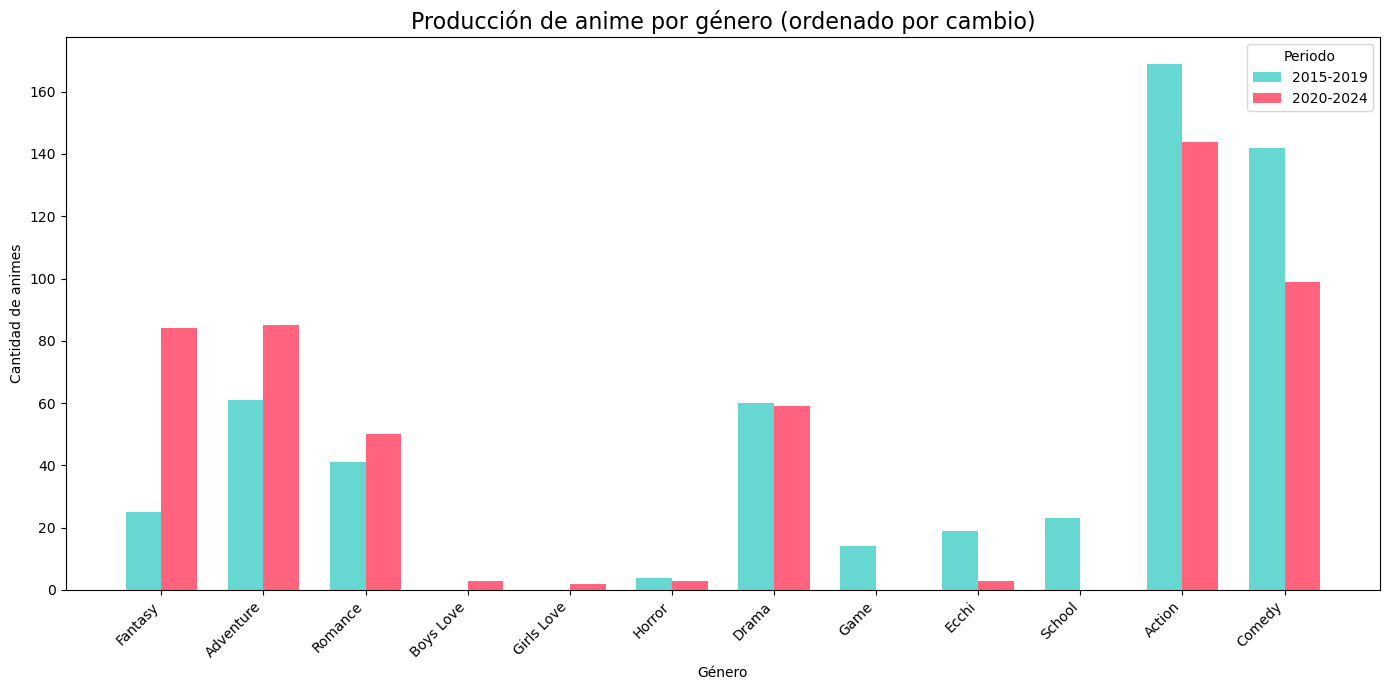

In [62]:

generos_deseados = ['Fantasy', 'Action', 'Adventure', 'Romance', 'Comedy', 'Drama',
                    'Boys Love', 'Girls Love', 'Horror', 'Game', 'School', 'Slice Of Life', 'Ecchi']

# Filtrar y ordenar por cambio (2020-2024 - 2015-2019)
comparacion_filtrada = comparacion[comparacion.index.isin(generos_deseados)].copy()
comparacion_filtrada['Cambio'] = comparacion_filtrada['2020-2024'] - comparacion_filtrada['2015-2019']
comparacion_filtrada = comparacion_filtrada.sort_values(by='Cambio', ascending=False)

# Nuevos nombres ordenados
generos_ordenados = comparacion_filtrada.index.tolist()

# -----------------------------
# Colores actualizados
# -----------------------------
color_2015 = "#66D7D1"  # Turquesa
color_2020 = "#FF637D"  # Rosa fuerte

# -----------------------------
# Plot con orden aplicado
# -----------------------------
x = np.arange(len(generos_ordenados))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 7))

ax.bar(x - width/2, comparacion_filtrada['2015-2019'], width, label='2015-2019', color=color_2015)
ax.bar(x + width/2, comparacion_filtrada['2020-2024'], width, label='2020-2024', color=color_2020)

ax.set_xlabel('Género')
ax.set_ylabel('Cantidad de animes')
ax.set_title('Producción de anime por género (ordenado por cambio)', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(generos_ordenados, rotation=45, ha='right')
ax.legend(title='Periodo')

plt.tight_layout()
plt.show()


 <h4 style="color:#cc5064;font-weight: bold;">Conclusion</h4>
Ha habido un cambio notorio en varios géneros. La fantasía ha aumentado considerablemente en producción en los años posteriores al COVID, reflejando un auge del género. A pesar de una ligera caída, la acción sigue siendo uno de los géneros más producidos y populares.

La aventura ha crecido notablemente, lo que indica una tendencia hacia historias de exploración y mundos épicos. Romance, comedia y drama mantienen su popularidad con un crecimiento más moderado, lo que sugiere una demanda constante.

Géneros como Boys Love y Girls Love, antes inexistentes en producción, han comenzado a aparecer, reflejando una mayor aceptación social.

En contraste, géneros como horror, slice of life, game y school han disminuido, lo que podría señalar un cambio de preferencias del público o una reorientación por parte de los estudios hacia contenidos con mayor carga de fantasía y escapismo.

Me gustaria mencionar que también ha bajado en producción el ecchi, puede ser por un cambio en el tipo de espectador que buscan las producciones.

In [63]:
# Filtrar y hacer copia explícita
fantasy_2024 = df_2024[
    (df_2024['genres_1'] == 'Fantasy') | (df_2024['genres_2'] == 'Fantasy')
].copy()

# Contar cuántos animes fantasy ha hecho cada estudio
estudios_fantasy_2024 = fantasy_2024['studios'].value_counts().reset_index()
estudios_fantasy_2024.columns = ['Estudio', 'Cantidad']
estudios_fantasy_2024 = estudios_fantasy_2024.sort_values(by='Cantidad', ascending=False)

# Mostrar los resultados
estudios_fantasy_2024.head(10)


,Estudio,Cantidad
0,Toei Animation,42
1,Unknown,37
2,J.C.Staff,29
3,Madhouse,21
4,Pierrot,20
5,ufotable,18
6,A-1 Pictures,14
7,Bones,12
8,Kyoto Animation,12
9,Nippon Animation,11


El estudio que más animes ha sacado de fantasía es toei animation, es un buen reference de animación.

In [64]:
# Filtrar animes de fantasía (género 1 o 2)
fantasy_2024 = df_2024[
    (df_2024['genres_1'] == 'Fantasy') | (df_2024['genres_2'] == 'Fantasy')
].copy()

# Eliminar los que no tienen score o estudios
fantasy_2024 = fantasy_2024.dropna(subset=['score', 'studios', 'titles'])

# Ordenar por puntuación descendente
top_fantasy_animes = fantasy_2024.sort_values(by='score', ascending=False)

# Seleccionar columnas relevantes y mostrar los 10 primeros
top_10 = top_fantasy_animes[['titles', 'score', 'studios']].head(10)

# Mostrar resultados
top_10

,titles,score,studios
4908,Jujutsu Kaisen 2nd Season,8.83,MAPPA
4758,Kimetsu no Yaiba: Yuukaku-hen,8.75,ufotable
4358,Violet Evergarden,8.68,Kyoto Animation
4618,Fate/stay night Movie: Heaven's Feel - III. Sp...,8.66,ufotable
4634,Kimetsu no Yaiba Movie: Mugen Ressha-hen,8.59,ufotable
3810,Ookami Kodomo no Ame to Yuki,8.57,Studio Chizu
3785,Fate/Zero 2nd Season,8.55,ufotable
4833,Chainsaw Man,8.51,MAPPA
4737,Ousama Ranking,8.51,Wit Studio
4458,Yakusoku no Neverland,8.50,CloverWorks


Aunque luego dentro de el top 10 de animes que mejor puntuación dan los espectadores de repite más MAPPA, y toei no entra dentro del top, el hacer más cantidad no tiene porque significar más calidad.

In [65]:
# Filtrar y hacer copia explícita
adventure_2024 = df_2024[
    (df_2024['genres_1'] == 'Adventure') | (df_2024['genres_2'] == 'Adventure')
].copy()

# Contar cuántos animes adventure ha hecho cada estudio
estudios_adventure_2024 = adventure_2024['studios'].value_counts().reset_index()
estudios_adventure_2024.columns = ['Estudio', 'Cantidad']
estudios_adventure_2024 = estudios_adventure_2024.sort_values(by='Cantidad', ascending=False)

# Mostrar los resultados
estudios_adventure_2024.head(10)


,Estudio,Cantidad
0,Toei Animation,165
1,Sunrise,71
2,Pierrot,57
3,Nippon Animation,53
4,Madhouse,52
5,TMS Entertainment,47
6,J.C.Staff,45
7,Tatsunoko Production,43
8,Unknown,43
9,OLM,31


Aqui toei animatión es uno de los que más tienen también, seguido por Sunrise y pierrot.

In [66]:
# Filtrar animes de fantasía
adventure_2024 = df_2024[
    (df_2024['genres_1'] == 'Adventure') | (df_2024['genres_2'] == 'Adventure')
].copy()
# Eliminar los que no tienen score o estudios 
adventure_2024 = adventure_2024.dropna(subset=['score', 'studios', 'titles'])

# Ordenar por puntuación descendente
top_adventure_animes = adventure_2024.sort_values(by='score', ascending=False)

# Seleccionar columnas relevantes y mostrar los 10 primeros
top_10_2 = top_adventure_animes[['titles', 'score', 'studios']].head(10)

# Mostrar resultados
top_10_2

,titles,score,studios
4933,Sousou no Frieren,9.38,Madhouse
3482,Fullmetal Alchemist: Brotherhood,9.09,Bones
3732,Hunter x Hunter (2011),9.04,Madhouse
4840,Bleach: Sennen Kessen-hen,9.02,Pierrot
4859,Vinland Saga Season 2,8.81,MAPPA
2708,Sen to Chihiro no Kamikakushi,8.77,Studio Ghibli
4509,Vinland Saga,8.75,Wit Studio
4055,Mushishi Zoku Shou 2nd Season,8.73,Artland
2532,One Piece,8.72,Toei Animation
3999,Mushishi Zoku Shou,8.69,Artland


Vemos aqui que toei animation si esta en el top 10, pero Madhouse y Artland se repiten más.

 <h4 style="color:#33918d;font-weight: bold;">Insight 2</h4>
Desajuste entre lo que más se produce y más se valora.

1 . Número de animes producidos.

2 . Media de puntuación (score).

3 . Contrastar: ¿se produce mucho algo que no se valora tanto? ¿O hay géneros poco producidos pero muy bien valorados?

In [67]:
# Calculamos las medias para cada periodo
media_2015_2019 = media_puntuaciones(df_2015_2019, 'genre_1', 'genre_2', 'score')
media_2015_2019.rename(columns={'score': 'Media_2015_2019'}, inplace=True)

media_2020_2024 = media_puntuaciones(df_2020_2024, 'genres_1', 'genres_2', 'score')
media_2020_2024.rename(columns={'score': 'Media_2020_2024'}, inplace=True)

# Unimos y calculamos la diferencia
comparativa = pd.merge(media_2015_2019, media_2020_2024, on='Género', how='outer')
comparativa['Diferencia'] = comparativa['Media_2020_2024'] - comparativa['Media_2015_2019']
comparativa = comparativa.sort_values(by='Media_2020_2024', ascending=False)
comparativa = comparativa.dropna(subset=['Diferencia'])
comparativa.sort_index(inplace=True) 
comparativa

,Género,Media_2015_2019,Media_2020_2024,Diferencia
0,Action,7.627160,7.763264,0.136104
1,Adventure,7.749180,7.760824,0.011643
4,Comedy,7.655282,7.668586,0.013304
7,Drama,7.748667,8.019831,0.271164
8,Ecchi,7.497895,7.020000,-0.477895
9,Fantasy,7.684800,7.589881,-0.094919
15,Horror,6.952500,7.486667,0.534167
22,Mystery,7.812059,7.942273,0.130214
26,Romance,7.517317,7.658600,0.141283
28,Sci-Fi,7.611071,7.925000,0.313929


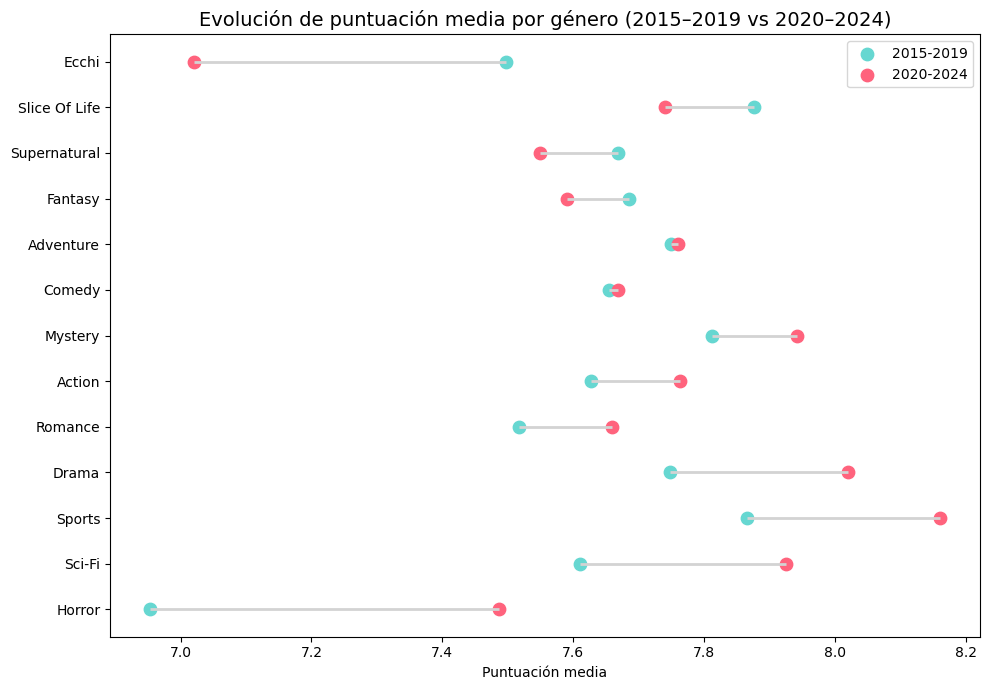

In [68]:
data = {
    'Género': ['Action', 'Adventure', 'Comedy', 'Drama', 'Ecchi', 'Fantasy', 'Horror',
               'Mystery', 'Romance', 'Sci-Fi', 'Slice Of Life', 'Sports', 'Supernatural'],
    'Media_2015_2019': [7.627160, 7.749180, 7.655282, 7.748667, 7.497895, 7.684800, 6.952500,
                        7.812059, 7.517317, 7.611071, 7.876286, 7.865000, 7.668235],
    'Media_2020_2024': [7.763264, 7.760824, 7.668586, 8.019831, 7.020000, 7.589881, 7.486667,
                        7.942273, 7.658600, 7.925000, 7.740000, 8.161250, 7.550000]
}
df = pd.DataFrame(data)
df['Diferencia'] = df['Media_2020_2024'] - df['Media_2015_2019']

# -------------------------
# Ordenar por la diferencia (crecimiento) de mayor a menor
df = df.sort_values('Diferencia', ascending=False)

# -------------------------
# Colores y posiciones
# -------------------------
color_2015 = '#66D7D1'
color_2020 = '#FF637D'
y = range(len(df))

# -------------------------
# Plot
# -------------------------
fig, ax = plt.subplots(figsize=(10, 7))

# Líneas
ax.hlines(y=y, xmin=df['Media_2015_2019'], xmax=df['Media_2020_2024'], color='lightgray', linewidth=2)

# Puntos
ax.scatter(df['Media_2015_2019'], y, color=color_2015, label='2015-2019', s=80)
ax.scatter(df['Media_2020_2024'], y, color=color_2020, label='2020-2024', s=80)

# Etiquetas
ax.set_yticks(y)
ax.set_yticklabels(df['Género'])
ax.set_xlabel('Puntuación media')
ax.set_title('Evolución de puntuación media por género (2015–2019 vs 2020–2024)', fontsize=14)
ax.legend()

plt.tight_layout()
plt.show()

 <h4 style="color:#33918d;font-weight: bold;">Conclusiones</h4>
Los géneros que más han aumentado su puntuación media en los últimos años son Horror, que ha experimentado una mejora notable partiendo de una media bastante baja, seguido por Sports y Drama, que ahora se posicionan entre los mejor valorados. También destacan los incrementos en Sci-Fi y Mystery, así como mejoras más moderadas en Action y Romance.

En cambio, a pesar del fuerte aumento en la producción del género Fantasy, su puntuación media ha descendido ligeramente. Esto podría deberse precisamente a su mayor volumen de producción: al haber más títulos, es posible que se haya incrementado también la cantidad de animes con menor calidad o recepción, afectando negativamente a su media.

Por otro lado, el género que más ha caído en valoración es Ecchi. Esta bajada podría reflejar un cambio en el perfil del espectador de anime, que con el tiempo parece valorar menos la sexualización de los personajes femeninos, mostrando una tendencia hacia contenidos más cuidados o narrativamente ricos.

 <h4 style="color:#33918d;">· Ahora que tenemos que Sports es una de las mas valoradas, ¿en que plataforma tiene una mejor bienvenida?</h4>

In [69]:
# Filtrar animes de género 'Sports'
sports_animes = df_2024[df_2024['genres_1'] == 'Sports']
# Contar cuántos animes de 'Sports' han salido por plataforma
platform_count = sports_animes['type'].value_counts().reset_index()
platform_count.columns = ['Plataforma', 'Cantidad_Animes']
# Calcular la puntuación promedio por plataforma
platform_score = sports_animes.groupby('type')['score'].mean().reset_index()
platform_score.columns = ['Plataforma', 'Puntuación_Promedio']
# Unir la cantidad de animes y la puntuación promedio
platform_info = pd.merge(platform_count, platform_score, on='Plataforma')
platform_info = platform_info.sort_values(by='Cantidad_Animes', ascending=False)
platform_info

,Plataforma,Cantidad_Animes,Puntuación_Promedio
0,TV,64,7.557187
1,Movie,15,7.134667
2,OVA,9,7.353333
3,TV Special,5,6.478000
4,Special,2,7.950000
5,ONA,2,7.435000


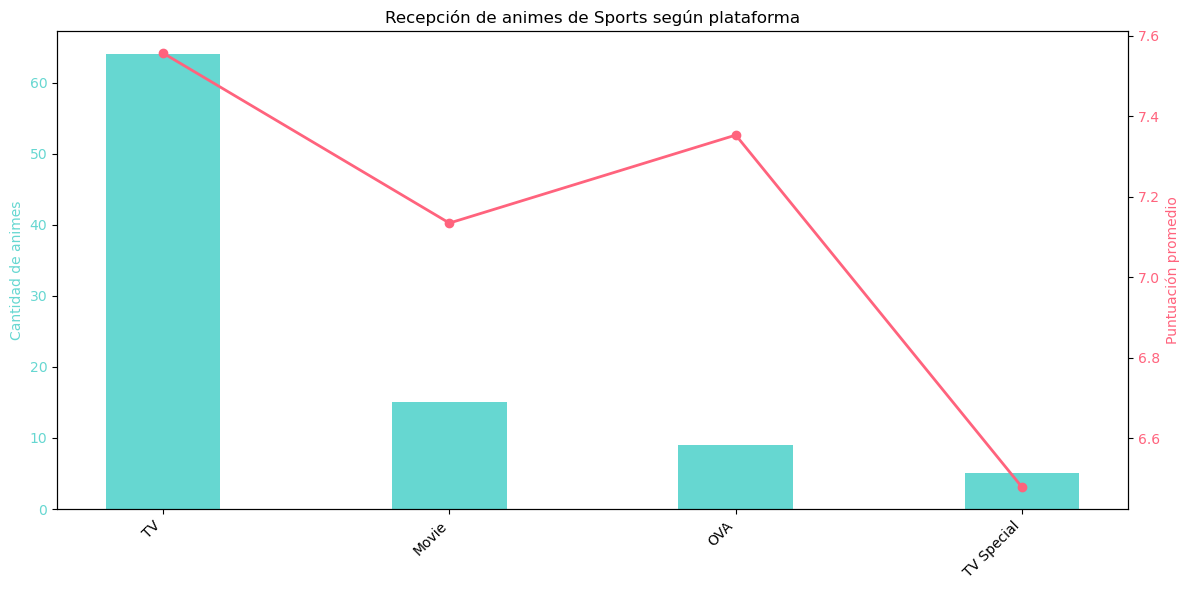

In [70]:
platform_info_filtrado = platform_info[~platform_info['Plataforma'].isin(['Special', 'ONA'])]

x = np.arange(len(platform_info_filtrado))  # posiciones en eje X
width = 0.4  # ancho para el espacio

fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras: cantidad de animes 
ax1.bar(x, platform_info_filtrado['Cantidad_Animes'], color='#66D7D1', width=width, label='Cantidad de animes')
ax1.set_ylabel('Cantidad de animes', color='#66D7D1')
ax1.tick_params(axis='y', labelcolor='#66D7D1')
ax1.set_xticks(x)
ax1.set_xticklabels(platform_info_filtrado['Plataforma'], rotation=45, ha='right')

# Línea: puntuación promedio 
ax2 = ax1.twinx()
ax2.plot(x, platform_info_filtrado['Puntuación_Promedio'], color='#FF637D', marker='o', linewidth=2, label='Puntuación promedio')
ax2.set_ylabel('Puntuación promedio', color='#FF637D')
ax2.tick_params(axis='y', labelcolor='#FF637D')

# Título y ajustes
plt.title('Recepción de animes de Sports según plataforma')
fig.tight_layout()
plt.show()

<h4 style="color:#cc5064;font-weight: bold;">Insight 3</h4>
Origen del contenido: ¿Qué se valora más los animes originales o las adaptaciones?

1 . Clasificación del contenido.

2 . Cálculo de la puntuación media.

3 . Comparación.

In [71]:

# Calculamos las medias para cada periodo
media_2015_2019 = media_puntuaciones_origen(df_2015_2019, 'source', 'score')
media_2015_2019.rename(columns={'score': 'Media_2015_2019'}, inplace=True)

media_2020_2024 = media_puntuaciones_origen(df_2020_2024, 'source', 'score')
media_2020_2024.rename(columns={'score': 'Media_2020_2024'}, inplace=True)

# Unimos y calculamos la diferencia
comparativa = pd.merge(media_2015_2019, media_2020_2024, on='Origen', how='outer')
comparativa['Diferencia'] = comparativa['Media_2020_2024'] - comparativa['Media_2015_2019']
comparativa = comparativa.sort_values(by='Media_2020_2024', ascending=False)
comparativa = comparativa.dropna(subset=['Diferencia'])
comparativa.sort_index(inplace=True) 
comparativa

,Origen,Media_2015_2019,Media_2020_2024,Diferencia
3,Game,6.919412,7.191667,0.272255
4,Light novel,7.578667,7.585281,0.006614
5,Manga,7.773046,7.847910,0.074864
8,Novel,7.683125,7.880000,0.196875
9,Original,7.711190,7.754444,0.043254
10,Other,6.470000,7.800000,1.330000
11,Visual novel,7.842000,7.930000,0.088000


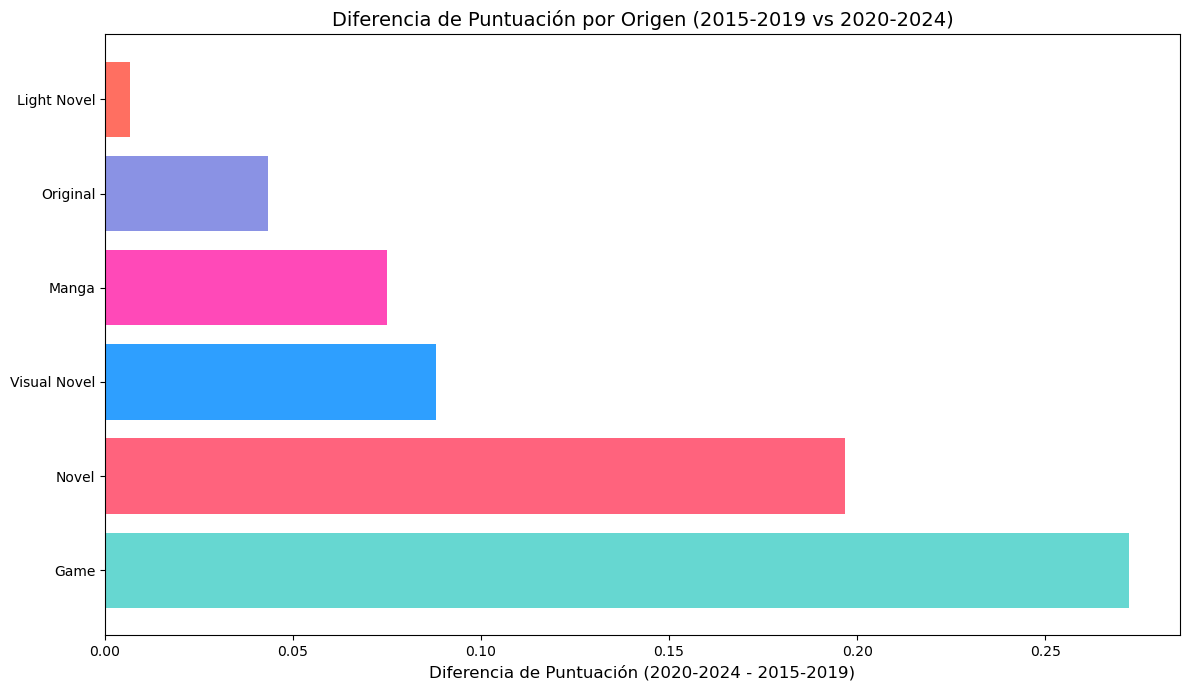

In [72]:
data_media = {
    'Origen': ['Game', 'Light Novel', 'Manga', 'Novel', 'Original', 'Visual Novel'],
    'Media_2015_2019': [6.919412, 7.578667, 7.773046, 7.683125, 7.711190, 7.842000],
    'Media_2020_2024': [7.191667, 7.585281, 7.847910, 7.880000, 7.754444, 7.930000],
    'Diferencia': [0.272255, 0.006614, 0.074864, 0.196875, 0.043254, 0.088000]
}

# Convertir los datos en un DataFrame
df_media = pd.DataFrame(data_media)

# Eliminar "Other"
df_media = df_media[df_media['Origen'] != 'Other']

# Ordenar el DataFrame por la diferencia (de mayor a menor)
df_media = df_media.sort_values('Diferencia', ascending=False)

# Colores personalizados (complementarios)
colors = ['#66d7d1', '#ff637D', '#2E9FFF', '#FF49B8', '#8A92E4', '#FF6F61']  # Complementarios de los dos colores dados

# Crear gráfico de barras horizontales
fig, ax = plt.subplots(figsize=(12, 7))

# Posicionar las barras con colores asignados
ax.barh(df_media['Origen'], df_media['Diferencia'], color=colors)

# Añadir etiquetas en las barras
for index, value in enumerate(df_media['Diferencia']):
    ax.text(value, index, f'{value:.3f}', va='center', color='white', fontweight='bold')

# Títulos y etiquetas
ax.set_xlabel('Diferencia de Puntuación (2020-2024 - 2015-2019)', fontsize=12)
ax.set_title('Diferencia de Puntuación por Origen (2015-2019 vs 2020-2024)', fontsize=14)

# Mejorar el diseño
plt.tight_layout()
plt.show()

<h4 style="color:#cc5064;font-weight: bold;">Conclusiones</h4>
Las adaptaciones a videojuegos y novelas han tenido una buena acogida, con un aumento en sus calificaciones. Las adaptaciones a juegos mejoraron en 0.27 y las de novelas en 0.20, indicando una recepción positiva en ambos casos.

 <h4 style="color:#33918d;font-weight: bold;">Insight 4</h4>
¿Que géneros llegan a mas gente? La cantidad de gente que le ha dado un score a cada genero de media.

In [73]:

popularidad_2015_2019 = df_2015_2019.groupby('genre_1')['scored_by'].mean().reset_index()
popularidad_2020_2024 = df_2020_2024.groupby('genres_1')['scored_by'].mean().reset_index()

popularidad_2015_2019.rename(columns={'genre_1': 'genres_1'}, inplace=True)
popularidad_2015_2019.rename(columns={'scored_by': 'scored_by_2015_2019'}, inplace=True)
popularidad_2020_2024.rename(columns={'scored_by': 'scored_by_2020_2024'}, inplace=True)

comparativa_popularidad = pd.merge(popularidad_2015_2019, popularidad_2020_2024, on='genres_1', how='outer')

comparativa_popularidad['Cambio'] = comparativa_popularidad['scored_by_2020_2024'] - comparativa_popularidad['scored_by_2015_2019']

comparativa_popularidad = comparativa_popularidad.sort_values(by='scored_by_2020_2024', ascending=False)
comparativa_popularidad.sort_index(inplace=True)
comparativa_popularidad = comparativa_popularidad.dropna(subset=['Cambio'])
comparativa_popularidad

,genres_1,scored_by_2015_2019,scored_by_2020_2024,Cambio
0,Action,107236.840237,220388.388889,113151.548652
1,Adventure,97287.733333,181806.083333,84518.350000
4,Comedy,80029.013889,160598.260870,80569.246981
7,Drama,91320.321429,183700.071429,92379.750000
9,Fantasy,95529.600000,100304.500000,4774.900000
19,Mystery,134846.857143,160187.571429,25340.714286
21,Romance,101450.500000,248991.454545,147540.954545
24,Slice of Life,79840.666667,83047.333333,3206.666667
25,Sports,32947.500000,262226.500000,229279.000000


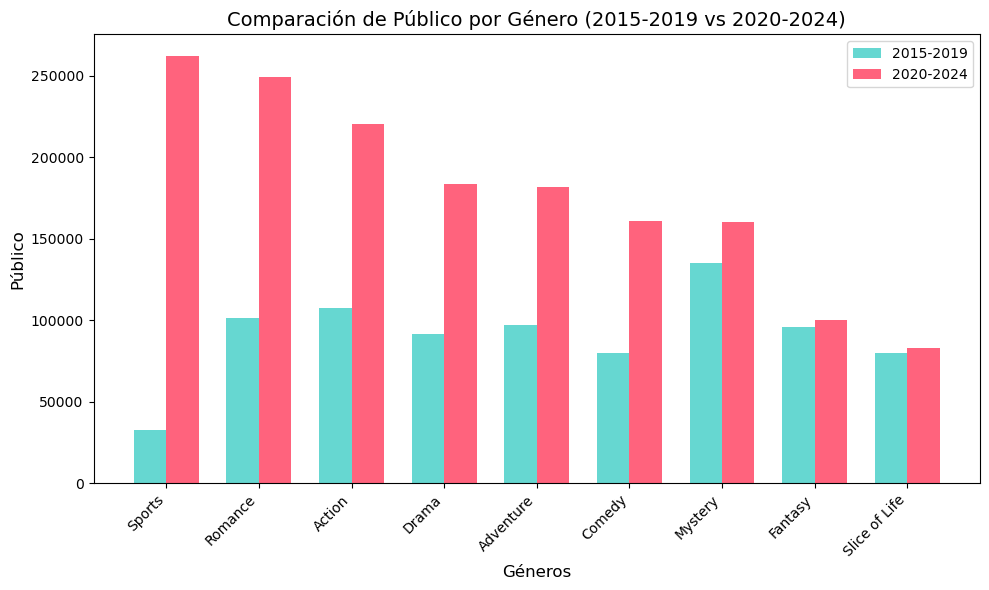

In [74]:
# Datos
genres = ['Action', 'Adventure', 'Comedy', 'Drama', 'Fantasy', 'Mystery', 'Romance', 'Slice of Life', 'Sports']
scored_2015_2019 = [107236.840237, 97287.733333, 80029.013889, 91320.321429, 95529.600000, 134846.857143, 101450.500000, 79840.666667, 32947.500000]
scored_2020_2024 = [220388.388889, 181806.083333, 160598.260870, 183700.071429, 100304.500000, 160187.571429, 248991.454545, 83047.333333, 262226.500000]
change = [113151.548652, 84518.350000, 80569.246981, 92379.750000, 4774.900000, 25340.714286, 147540.954545, 3206.666667, 229279.000000]

# Ordenar los géneros según las puntuaciones de 2020-2024 (de mayor a menor)
sorted_indices = np.argsort(scored_2020_2024)[::-1]

# Reorganizar los datos según el orden
genres_sorted = np.array(genres)[sorted_indices]
scored_2015_2019_sorted = np.array(scored_2015_2019)[sorted_indices]
scored_2020_2024_sorted = np.array(scored_2020_2024)[sorted_indices]

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Colores
color_1 = '#66d7d1'
color_2 = '#ff637D'

# Ancho de las barras
width = 0.35

# Posiciones para las barras
indices_sorted = np.arange(len(genres_sorted))

# Dibujar las barras
bar1 = ax.bar(indices_sorted - width/2, scored_2015_2019_sorted, width, label='2015-2019', color=color_1)
bar2 = ax.bar(indices_sorted + width/2, scored_2020_2024_sorted, width, label='2020-2024', color=color_2)

# Etiquetas y título
ax.set_xlabel('Géneros', fontsize=12)
ax.set_ylabel('Público', fontsize=12)
ax.set_title('Comparación de Público por Género (2015-2019 vs 2020-2024)', fontsize=14)
ax.set_xticks(indices_sorted)
ax.set_xticklabels(genres_sorted, rotation=45, ha='right', fontsize=10)

# Añadir leyenda
ax.legend()

# Mostrar gráfico
plt.tight_layout()
plt.show()

 <h4 style="color:#33918d;font-weight: bold;">Conclusiones</h4>
 Se observa un aumento notable en géneros como Sports, Action y Romance, siendo Sports el que ha registrado el mayor crecimiento de espectadores. Esto podría estar relacionado con un mayor interés social por la práctica deportiva en los últimos años, o bien con un efecto de motivación en los espectadores que consumen este tipo de contenido. Estos géneros no solo han mejorado su valoración, sino que se han posicionado entre los más destacados en términos de recepción.

Por su parte, Adventure y Drama mantienen una alta valoración, aunque su crecimiento ha sido más moderado. Su permanencia entre los géneros mejor valorados indica una base de fans sólida y constante.

En cuanto a Fantasy, su puntuación se ha mantenido relativamente estable, lo cual sugiere una popularidad constante a pesar de los cambios en volumen de producción. Slice of Life, aunque con un público más específico, ha mostrado una ligera mejora en su puntuación media, lo que indica una recepción positiva dentro de su nicho.

 <h2 style="color:#cc5064;font-weight: bold;">Recomendaciones estratégicas</h2>

<h4 style="color:#33918d;">1. Apostar por </h4>
Géneros en crecimiento: Sports, Drama, Romance, Acción, Misterio han ganado popularidad y valoración. Especial atención a Sports, que conecta con el aumento del interés por el ejercicio tras el confinamiento.
Diversidad: Boys Love y Girls Love han empezado a producirse más y reflejan una sociedad más abierta. Vale la pena explorarlos con calidad narrativa.
Adaptaciones de videojuegos: Aunque menos comunes que las de manga o novelas, están siendo cada vez mejor valoradas.

<h4 style="color:#cc5064;">2. Mantener</h4>
Fantasy, Slice of Life y Mystery mantienen un público estable.
Las adaptaciones de novelas ligeras y visual novels siguen siendo una apuesta segura si se cuida la calidad.

<h4 style="color:#33918d;">3. Explorar</h4>
Hacer más series que películas en géneros como Sports, ya que las series reciben mejor puntuación.
OVAs de franquicias ya existentes suelen ser bien recibidas.
Horror ha mejorado mucho su posición y tiene potencial para seguir creciendo.

<h4 style="color:#cc5064;">4. Reajustar</h4>
Evitar la sobreproducción en géneros como Fantasy, donde la calidad media ha bajado.
Revisar el enfoque de estudios que producen mucho pero no logran destacar, como Toei Animation.
Apostar incluso a estudios que hayan dado mejores resultados sin contar con la cantidad de producciones que tengan.

<h4 style="color:#33918d;">5. Por lo que no apostaria</h4>
El ecchi ha bajado mucho en producción y puntuación. El público parece valorar más la calidad narrativa que el fanservice.

<h4 style="color:#cc5064;">Contexto social</h4>
La pandemia, el auge del deporte, y una mayor conciencia social están moldeando los gustos. El anime debe adaptarse a estos cambios, apostando por historias más respetuosas, diversas y emocionalmente ricas.